# Projeto da Udacity sobre o naufrágio do Titanic.

Pacotes utilizados:
   
    pandas
    numpy
    matplotlib
    seaborn
    unicodecsv
    
Este projeto consiste em responder algumas perguntas estipuladas pelo criador do código, com o intuito de tentar analisar
as razões pelo qual grupos de pessoas morreram com uma frequência maior.

Perguntas Feitas:

Qual a frequência de mortos com relação a idade dos passageiros?

Qual a contagem das pessoas que pagaram uma passagem acima da média?

Qual o total de sobreviventes e mortos do naufrágio?

Qual o total de sobreviventes e mortos do naufrágio com relação ao sexo dos passageiros?

Qual o total de sobreviventes e mortos do naufrágio com relação a classe dos passageiros?

Qual o total de sobreviventes e mortos do naufrágio com relação a cidade de embarque dos passageiros?

Qual a relação de sobreviventes e mortos por faixa etária?

# Dicionário dos dados

Survived: Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim

Pclass: Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe

Sex: Sexo do passageiro

Age: Idade do passageiro

Sibsp: Informa a quantidade de irmãos e cônjuges que o paciente possuía na embarcação

Parch: Quantidade de crianças e idosos (pais) relativos ao passageiro

Fare: Valor da passagem

Embarked: Cidade onde o passageiro embarcou

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodecsv 

# Limpeza dos dados

Lendo e imprimindo os 10 primeiras linhas do arquivo titanic-data-6.csv.

In [2]:
titanic_df = pd.read_csv('titanic-data-6.csv')

titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Imprimindo a forma do arquivo.

In [3]:
titanic_df.shape

(891, 12)

Imprimindo as informações do arquivo. Existem linhas que não tem informação.

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Somando todas as linhas sem informação para poder excluir ou modificar futuramente.

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Retirando colunas que não serão utilizadas.

In [6]:
titanic_df.drop(['Ticket','Cabin','PassengerId'], axis = 1 , inplace = True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Trocar NaN por 0 e desconsiderar mais tarde. Removendo linhas de embarque NaN.

In [7]:
titanic_df.dropna(how='any', subset= ['Embarked'], inplace = True)
titanic_df['Age'].fillna(0, inplace = True)
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,0.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


Verificando se não existem mais linhas sem informação.

In [8]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Qual a frequência de mortos com relação a idade dos passageiros?

Plotando de um histograma que retira as idades = 0.0 para que se possa verificar qual foi a maior quantidade de passageiros com relação a idade.

Os picos de idades se encontram na faixa de 20 até 35 anos.

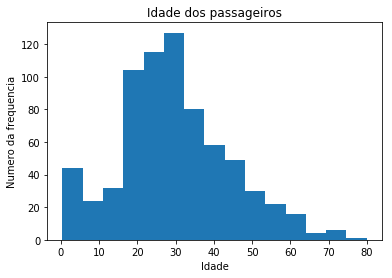

In [9]:
Ages = titanic_df[titanic_df['Age'] > 0.0]['Age'].plot.hist(bins=15)

plt.xlabel('Idade')
plt.ylabel('Numero da frequencia')
plt.title('Idade dos passageiros')


plt.show()

Ao utilizar o describe notamos que a maioria das pessoas eram da terceira classe e a média de idade é aproximadamente 24 anos.

In [10]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681
std,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Qual a contagem das pessoas que pagaram uma passagem acima da média?

A contagem das pessoas que pagaram uma passagem acima da média é mais que 3 vezes menor que as pessoas que pagaram abaixo da média.

O que ajuda a justificar o maior número de mortos entre os passageiros das classes menores.

In [11]:
passagem = titanic_df['Fare']

def count_fare(passagem):

    """
      Função de exemplo com anotações.
      Argumentos:
          param1: Lista das passagens.
      Retorna:
          Contagem dos valores acima e abaixo da média das passagens.
    """

    valor1 = 0
    valor2 = 0

    for i in passagem:
        if i > 33.0:
            valor1 += 1
        elif i <= 33.0:
            valor2 += 1

    return [valor1, valor2]

print('Imprimindo o resultado da contagem das passagem acima e abaixo da média')
print(count_fare(passagem))

Imprimindo o resultado da contagem das passagem acima e abaixo da média
[204, 685]


# Qual o total de sobreviventes e mortos do naufrágio?

Mudai os nomes das colunas para uma melhor visualização gráfica 1 = sobreviveu e 0 = morreu.

Pelo gráfico é possível ver que a maior parte dos passageiros morreram.

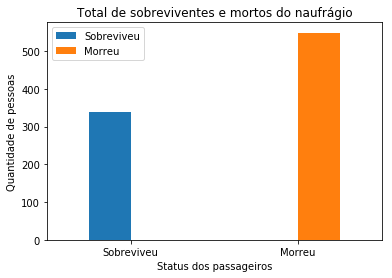

In [12]:

titanic_df['Survived'] = titanic_df['Survived'].replace([0,1],['Morreu','Sobreviveu'])

sobrevivente = titanic_df[titanic_df['Survived'] == 'Sobreviveu'].Survived.value_counts()
morto = titanic_df[titanic_df['Survived'] == 'Morreu'].Survived.value_counts()



df_survived = pd.DataFrame([sobrevivente,morto])
df_survived.index = ['Sobreviveu', 'Morreu']
df_survived.plot(kind='bar')


plt.title('Total de sobreviventes e mortos do naufrágio')
plt.xlabel('Status dos passageiros')
plt.ylabel('Quantidade de pessoas')
plt.xticks(rotation=0)


plt.show()




# Qual o total de sobreviventes e mortos do naufrágio com relação ao sexo dos passageiros?

Pelo gráfico conseguimos inferir que a maior parte dos passageiros que morreram foram do sexo masculino.

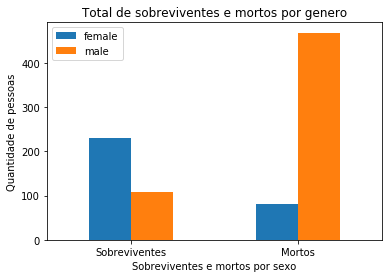

In [13]:
sobrevivente_genero = titanic_df[titanic_df['Survived'] == 'Sobreviveu'].Sex.value_counts()
morto_genero = titanic_df[titanic_df['Survived'] == 'Morreu'].Sex.value_counts()

df_morte_genero = pd.DataFrame([sobrevivente_genero,morto_genero])
df_morte_genero.index = ['Sobreviventes', 'Mortos']
df_morte_genero.plot(kind='bar')

plt.title('Total de sobreviventes e mortos por genero')
plt.xlabel('Sobreviventes e mortos por sexo')
plt.ylabel('Quantidade de pessoas')
plt.xticks(rotation=0)

plt.show()

# Qual o total de sobreviventes e mortos do naufrágio com relação a classe dos passageiros?

A maior parte dos que morreram estavam situadas na terceira classe e os passageiros da primeira classe sobreviveram mais que morreram.

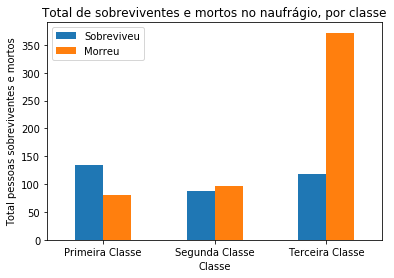

In [14]:
sobreviventes1class = titanic_df[titanic_df['Pclass'] == 1].Survived.value_counts()
sobreviventes2class = titanic_df[titanic_df['Pclass'] == 2].Survived.value_counts()
sobreviventes3class = titanic_df[titanic_df['Pclass'] == 3].Survived.value_counts()

df_classe = pd.DataFrame([sobreviventes1class,sobreviventes2class,sobreviventes3class])

df_classe.index = ["Primeira Classe","Segunda Classe","Terceira Classe"]
df_classe.columns = ['Sobreviveu','Morreu']
df_classe[['Sobreviveu','Morreu']].plot(kind="bar")
plt.title("Total de sobreviventes e mortos no naufrágio, por classe")
plt.xlabel('Classe')
plt.ylabel('Total pessoas sobreviventes e mortos')
plt.xticks(rotation=0)

plt.show()

Número total de pessoas que morreram no naufrágio foram de viajantes da terceira classe.

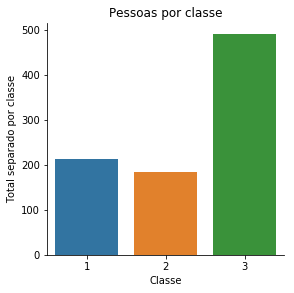

In [15]:
sns.factorplot('Pclass', data=titanic_df, kind='count')

plt.title('Pessoas por classe')
plt.xlabel('Classe')
plt.ylabel('Total separado por classe')
plt.show()

# Qual o total de sobreviventes e mortos do naufrágio com relação a cidade de embarque dos passageiros?

A possível razão de ter sobrevivido mais gente que morrido em Cherbourg pode ter sido devido ao fato de ter mais proporcionalmente mais passageiros da primeira classe.

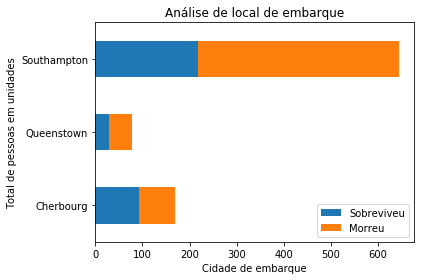

In [16]:
local_C = titanic_df[titanic_df['Embarked'] == 'C'].Survived.value_counts()
local_Q = titanic_df[titanic_df['Embarked'] == 'Q'].Survived.value_counts()
local_S = titanic_df[titanic_df['Embarked'] == 'S'].Survived.value_counts()

df_embarque = pd.DataFrame([local_C,local_Q,local_S]) 

df_embarque.index = ['Cherbourg', 'Queenstown', 'Southampton']
df_embarque.columns = ['Sobreviveu','Morreu']
df_embarque[['Sobreviveu','Morreu']].plot(kind="barh",stacked=True)
plt.title('Análise de local de embarque')
plt.xlabel('Cidade de embarque')
plt.ylabel('Total de pessoas em unidades')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


O coeficiente de Pearson nos indica o nível de correlação entre as variáveis. A correlação se dá com valores próximos a 1 ou -1.

Nota-se que para todas as variáveis temos números distantes dos valores desejados para que se tenha correlação. O que nos diz que não conseguimos tirar conclusões definitivas relacionando 2 variáveis.

In [17]:
titanic_df.corr(method='pearson')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.358174,0.081656,0.016824,-0.548193
Age,-0.358174,1.000000,-0.183675,-0.047354,0.132830
SibSp,0.081656,-0.183675,1.000000,0.414542,0.160887
Parch,0.016824,-0.047354,0.414542,1.000000,0.217532
Fare,-0.548193,0.132830,0.160887,0.217532,1.000000


Conseguimos extrair a relação de sobreviventes e mortos que embarcaram em cada cidade e com respeiro a suas classes. Os resultados explicam melhor o motivo de que os embarcantes de Cherbourg morreram com uma frequência menor que os das demais cidades. 

O motivo foi uma maior presença percentual de viajantes da primeira classe ou a posição destes passageiros no navio.

In [18]:
titanic_df['Survived'] = titanic_df['Survived'].replace(['Morreu','Sobreviveu'],[0,1])

titanic_df.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

# Qual a relação de sobreviventes e mortos por faixa etária?

Com os gráficos a seguir, pode-se inferir que os adultos morreram em uma quantidade e proporção maior que as crianças e os idosos. O que nos leva a concluir que os adultos poderiam ter cedido seus lugares em um eventual resgate para as faixas etária mais "debilitadas".

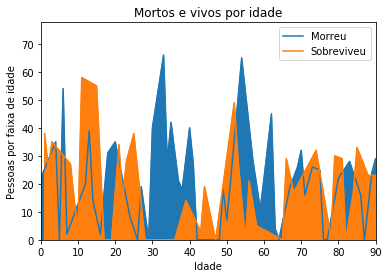

In [19]:
titanic_df.groupby('Survived')['Age'].plot(kind='area')


plt.xlim(0,90)
plt.title('Mortos e vivos por idade')
plt.xlabel('Idade')
plt.ylabel('Pessoas por faixa de idade')
plt.legend(['Morreu','Sobreviveu'])

plt.show()

Gráfico de área relacionando os sobreviventes e mortos para as crianças. Nota-se que grande parte sobreviveu a tragédia.

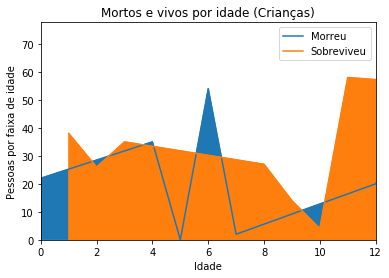

In [20]:
titanic_df.groupby('Survived')['Age'].plot(kind='area')

plt.xlim(0,12)
plt.title('Mortos e vivos por idade (Crianças)')
plt.xlabel('Idade')
plt.ylabel('Pessoas por faixa de idade')
plt.legend(['Morreu','Sobreviveu'])

plt.show()


Gráfico de área relacionando os sobreviventes e mortos para os adultos. Nota-se que grande parte não sobreviveu a tragédia.

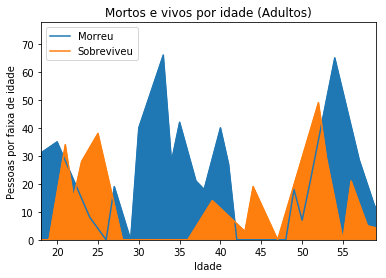

In [21]:
titanic_df.groupby('Survived')['Age'].plot(kind='area')

plt.xlim(18,59)
plt.title('Mortos e vivos por idade (Adultos)')
plt.xlabel('Idade')
plt.ylabel('Pessoas por faixa de idade')
plt.legend(['Morreu','Sobreviveu'])
plt.show()

Gráfico de área relacionando os sobreviventes e mortos para os idosos. Nota-se que grande parte sobreviveu a tragédia.

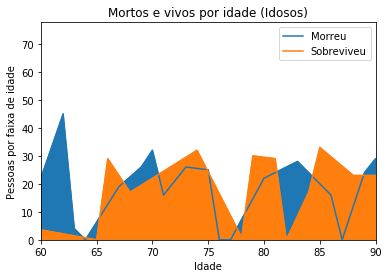

In [22]:
titanic_df.groupby('Survived')['Age'].plot(kind='area')


plt.xlim(60,90)
plt.title('Mortos e vivos por idade (Idosos)')
plt.xlabel('Idade')
plt.ylabel('Pessoas por faixa de idade')
plt.legend(['Morreu','Sobreviveu'])
plt.show()

# Conclusão

No desastre do titanic existem inúmeras variáveis para ser levadas em consideração. As que foram escolhidas para este estudo são as que relacionam idade, sexo, condição social e cidade de origem.

O estudo mostrou que mulheres, crianças e idosos sobreviveram com uma taxa maior que os homens adultos. Além disso, pessoas de uma maior classe social também teve uma taxa de sobrevivencia acima da média das demais.

Pode-se fazer outros estudos, como por exemplo relacionar a taxa de morte com a de pessoas que tenham entrado de graça ou de pessoas com parentes a bordo etc... Como foi explicado no corpo do relatório, não é um estudo conclusivo, mas ajuda a elucidar e responder algumas dúvidas sobre oque ocorreu no dia do naufrágio.

# Limitações

As limitações encontradas foram a ausência de dados de alguns passageiros e falta de informações importantes para execução da análise.

As idades faltantes foram atribuídas o número zero e desconsiderados em seguida e para os embarques faltantes foi feito um corte em toda a linha, pois foram somente a informação de 2 passageiros.

# Referências

https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5

https://github.com/kaburelabs/Titanic-Nanodegree-Udacity/blob/master/ProjetoTitanic.ipynb

https://www.kaggle.com/c/titanic/data